**효율적인 투자선**\
손해는 최소화하면서 이익은 최대화하는 방법

# 3개의 종목의 비율을 어떻게 구매해야 위험은 최소화하면서 이익은 최대화할 수 있을까? 
-> 포트폴리오 설계\
stocks = ["TSLA", "AAPL", "NVDA"]

In [9]:
import FinanceDataReader as fdr

stocks = ["TSLA", "AAPL", "NVDA"]

df = fdr.DataReader(stocks)
df = df.dropna()
df

,TSLA,AAPL,NVDA
2010-06-29,1.592667,7.726042,0.240293
2010-06-30,1.588667,7.586103,0.234102
2010-07-01,1.464000,7.494113,0.238000
2010-07-02,1.280000,7.447672,0.235019
2010-07-06,1.074000,7.498640,0.232497
...,...,...,...
2024-10-14,219.160004,231.300003,138.070007
2024-10-15,219.570007,233.850006,131.600006
2024-10-16,221.330002,231.779999,135.720001
2024-10-17,220.889999,232.149994,136.929993


### 일간수익률

In [16]:
#전날 대비 %(*100해줌)변동이 생겼다
daily_ret = df.pct_change()
daily_ret

,TSLA,AAPL,NVDA
2010-06-29,NaN,NaN,NaN
2010-06-30,-0.002511,-0.018113,-0.025763
2010-07-01,-0.078473,-0.012126,0.016650
2010-07-02,-0.125683,-0.006197,-0.012524
2010-07-06,-0.160937,0.006843,-0.010732
...,...,...,...
2024-10-14,0.006244,0.016480,0.024258
2024-10-15,0.001871,0.011025,-0.046860
2024-10-16,0.008016,-0.008852,0.031307
2024-10-17,-0.001988,0.001596,0.008915


### 연간수익률

In [21]:
annual_ret = daily_ret.mean() * 252
annual_ret

TSLA    0.506481
AAPL    0.277895
NVDA    0.547555
dtype: float64

### 분산(위험도) : 데이터 퍼짐
이때 3개를 동시에 구매하는 경우는 구할 수 없음\
2개를 동시에 구매하는 경우는 가능

In [24]:
##테슬라와 애플을 산다면?
daily_cov = daily_ret.cov()
daily_cov #일간위험도

,TSLA,AAPL,NVDA
TSLA,0.001285,0.000226,0.000374
AAPL,0.000226,0.000308,0.000244
NVDA,0.000374,0.000244,0.000823


In [26]:
annual_cov = daily_cov * 252
annual_cov #연간위험도 : 두개를 같이 구매했을 떄

,TSLA,AAPL,NVDA
TSLA,0.323941,0.057029,0.094129
AAPL,0.057029,0.077564,0.061451
NVDA,0.094129,0.061451,0.207372


## 시뮬레이션 돌리기

### 몬테카를로 시뮬레이션
반복된 무작위 샘플링을 사용하여 다양한 결과가 발생할 가능성을 구하는 계산 알고리즘 유형

In [46]:
import numpy as np
import pandas as pd

box= []

for i in range(10000):
    weights = np.random.random(len(stocks))
    weights /= sum(weights) #수익, 위험도에 대한 비중 돌려보기

    returns = np.dot(weights, annual_ret) #각 비중에 대한 수익률 계산

    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 
    #구매했을 때의 위험도
    #두번곱했기때문에 루트값 씌어주기

    box.append([returns, risk] + list(weights))

In [48]:
df = pd.DataFrame(box, columns = ['returns', 'risk'] + stocks)
df

,returns,risk,TSLA,AAPL,NVDA
0,0.453365,0.340385,0.290404,0.305058,0.404537
1,0.477839,0.369353,0.051758,0.250649,0.697592
2,0.509349,0.397388,0.086707,0.128476,0.784817
3,0.325603,0.276525,0.127016,0.803733,0.069251
4,0.450004,0.397499,0.579005,0.273565,0.147430
...,...,...,...,...,...
9995,0.446271,0.334581,0.280173,0.332924,0.386903
9996,0.408537,0.330427,0.380786,0.457530,0.161684
9997,0.458073,0.443294,0.708796,0.223869,0.067334
9998,0.425877,0.339683,0.392724,0.391409,0.215868


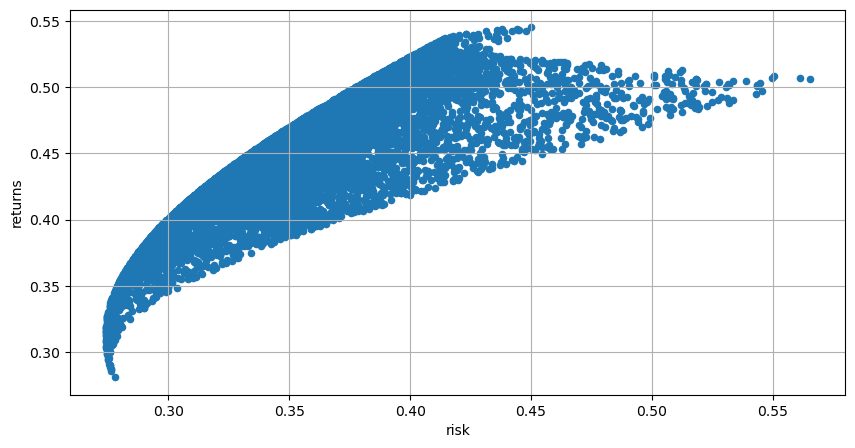

In [50]:
#시각화
import matplotlib.pyplot as plt

df.plot.scatter(x = 'risk', y = 'returns', figsize = (10,5), grid = True)

plt.xlabel("risk")
plt.ylabel("returns")
plt.show()
#여기서 효율적인 투자선은 범위에서 위쪽 경계선

#### 샤프지수 구하기
- 샤프지수 : (수익률 - 무위험수익률) / 위험도
- 무위험수익률 = 은행 기본 수익
-  샤프 지수가 가장 높은 포트폴리오는 최적의 위험-수익 조합을 제공하는 포트폴리오

In [71]:
import numpy as np
import pandas as pd

box= []

for i in range(10000):
    weights = np.random.random(len(stocks))
    weights /= sum(weights)

    returns = np.dot(weights, annual_ret) 
    
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 

    sharpe = returns / risk
    
    box.append([returns, risk, sharpe] + list(weights))

In [73]:
df = pd.DataFrame(box, columns = ['returns', 'risk', 'sharpe'] + stocks)
df

,returns,risk,sharpe,TSLA,AAPL,NVDA
0,0.497867,0.389481,1.278284,0.426100,0.119358,0.454542
1,0.508273,0.431287,1.178502,0.596808,0.054770,0.348422
2,0.432823,0.320837,1.349045,0.156280,0.401665,0.442056
3,0.531698,0.409830,1.297363,0.223685,0.024733,0.751581
4,0.439750,0.326264,1.347834,0.149586,0.376995,0.473419
...,...,...,...,...,...,...
9995,0.445691,0.334048,1.334214,0.278532,0.335323,0.386145
9996,0.425775,0.325610,1.307624,0.026605,0.447552,0.525842
9997,0.414022,0.308749,1.340966,0.197400,0.465121,0.337480
9998,0.455675,0.379786,1.199819,0.507446,0.263434,0.229121


- **max_sharp**

In [77]:
max_sharpe = df[df['sharpe'] == df['sharpe'].max()]
max_sharpe

,returns,risk,sharpe,TSLA,AAPL,NVDA
7794,0.439217,0.325331,1.350062,0.182234,0.374001,0.443765


- **min_risk**

In [81]:
#난 리스크가 zero인게 좋다
min_risk = df[df['risk'] ==  df['risk'].min()]
min_risk

,returns,risk,sharpe,TSLA,AAPL,NVDA
3033,0.310549,0.274075,1.13308,0.049271,0.871401,0.079328


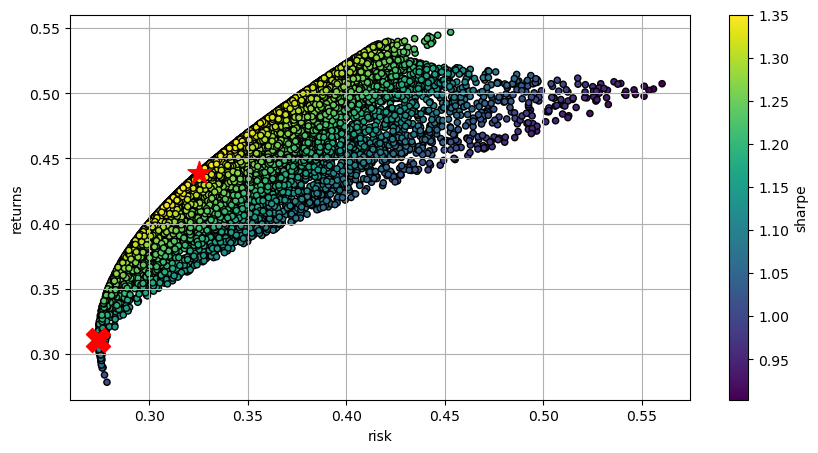

In [85]:
#시각화
import matplotlib.pyplot as plt

df.plot.scatter(x = 'risk', y = 'returns', c = 'sharpe', cmap = 'viridis', 
                edgecolor = 'k', figsize = (10,5), grid = True) #k는 black

plt.scatter(x=max_sharpe['risk'], y = max_sharpe['returns'],
           c = 'r', marker = '*', s = 300)

plt.scatter(x = min_risk['risk'], y = min_risk['returns'],
           c = 'r', marker = 'X', s = 300)

plt.xlabel("risk")
plt.ylabel("returns")
plt.show()